In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv(r'C:\Users\ZAK-TECH\Desktop\KAIM Week0\solar-challenge-week0\data\sierraleone-bumbuna.csv')


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')


#Summary Statistics & Missing-Value Report
print(df.describe())


                 GHI            DNI            DHI           ModA  \
count  509308.000000  509308.000000  509308.000000  509308.000000   
mean      185.000024     104.128943     108.104278     189.764194   
std       279.019460     200.954182     153.691835     281.888942   
min       -15.900000      -7.800000     -16.700000       0.000000   
25%        -3.300000      -0.300000      -4.100000       0.000000   
50%        -0.400000      -0.100000      -0.600000       1.200000   
75%       331.300000      74.800000     217.900000     327.200000   
max      1097.000000     772.300000     590.500000    1105.000000   

                ModB           Tamb             RH             WS  \
count  509308.000000  509308.000000  509308.000000  509308.000000   
mean      181.693908      26.214248      79.747674       1.089871   
std       269.988109       4.397260      20.556188       1.155220   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [19]:
missing_report = df.isna().sum()
print("Missing Value Report")
print(missing_report)

Missing Value Report
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         509308
is_outlier            0
dtype: int64


In [23]:
total_rows = len(df)
high_nulls = missing_report[missing_report // total_rows > 0.05]
print("Columns with >5% Nulls")
print(high_nulls)

Columns with >5% Nulls
Comments    509308
dtype: int64


In [24]:
#Outlier Detection (Z-Score)

z_score_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

from scipy.stats import zscore

z_scores = df[z_score_cols].apply(zscore, nan_policy='omit')
df['is_outlier'] = (z_scores.abs() > 3).any(axis=1)

print(f"\nTotal outliers flagged: {df['is_outlier'].sum()}")


Total outliers flagged: 12296


In [25]:
impute_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust']
for col in impute_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_20008\3283451036.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_20008\3283451036.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [26]:
df['Cleaning_Flag'] = df['is_outlier']


df_final = df[df['Cleaning_Flag'] == False].copy()


df_final.drop(columns=['Cleaning_Flag'], inplace=True)

df_final.to_csv(f'../data/sierraleone-bumbuna.csv', index=True)
print(f"\nCleaned data exported to data/sierraleone-bumbuna.csv")



Cleaned data exported to data/sierraleone-bumbuna.csv


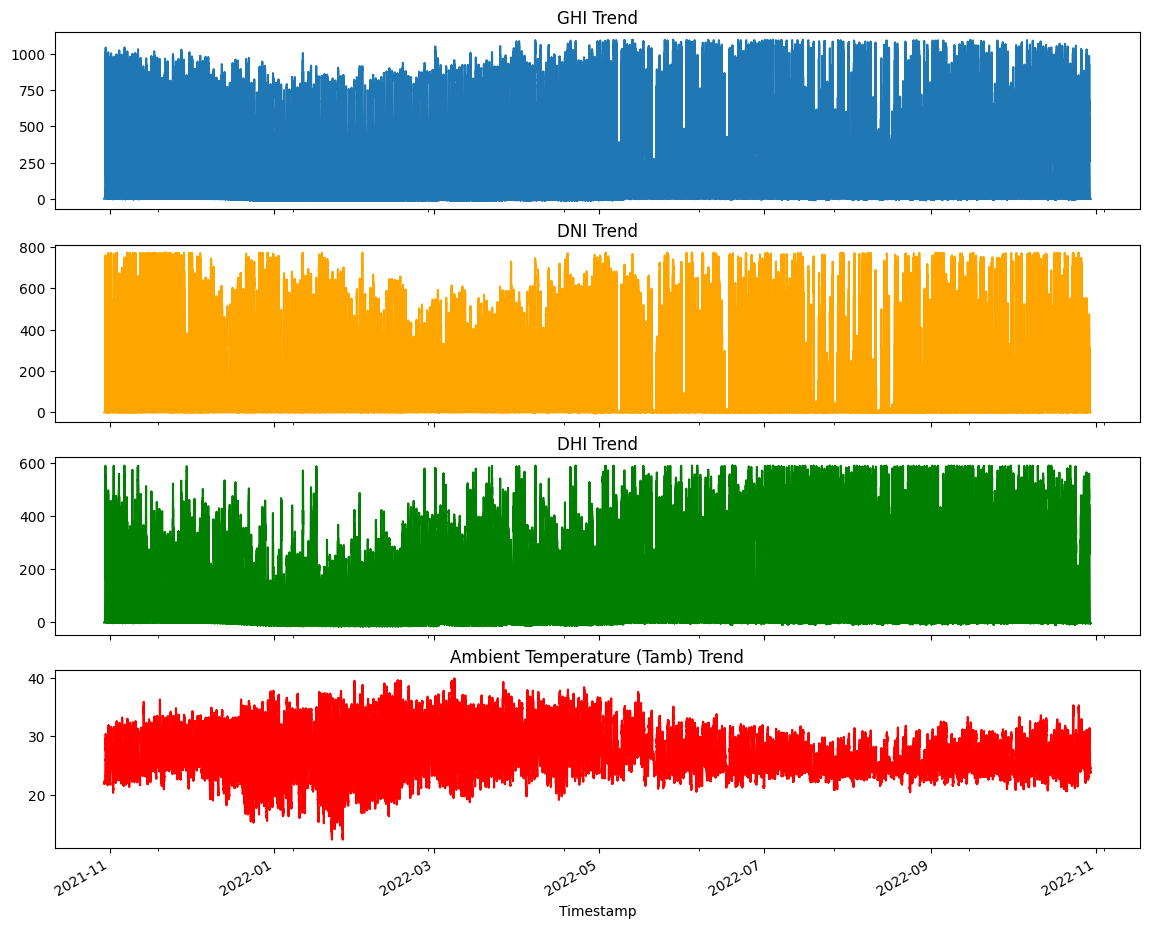

In [28]:
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

df[['GHI']].plot(ax=axes[0], title='GHI Trend', legend=False)
df[['DNI']].plot(ax=axes[1], title='DNI Trend', legend=False, color='orange')
df[['DHI']].plot(ax=axes[2], title='DHI Trend', legend=False, color='green')
df[['Tamb']].plot(ax=axes[3], title='Ambient Temperature (Tamb) Trend', legend=False, color='red')
plt.show()

Plot the monthly trends

C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_20008\3161080034.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


<Figure size 1200x600 with 0 Axes>

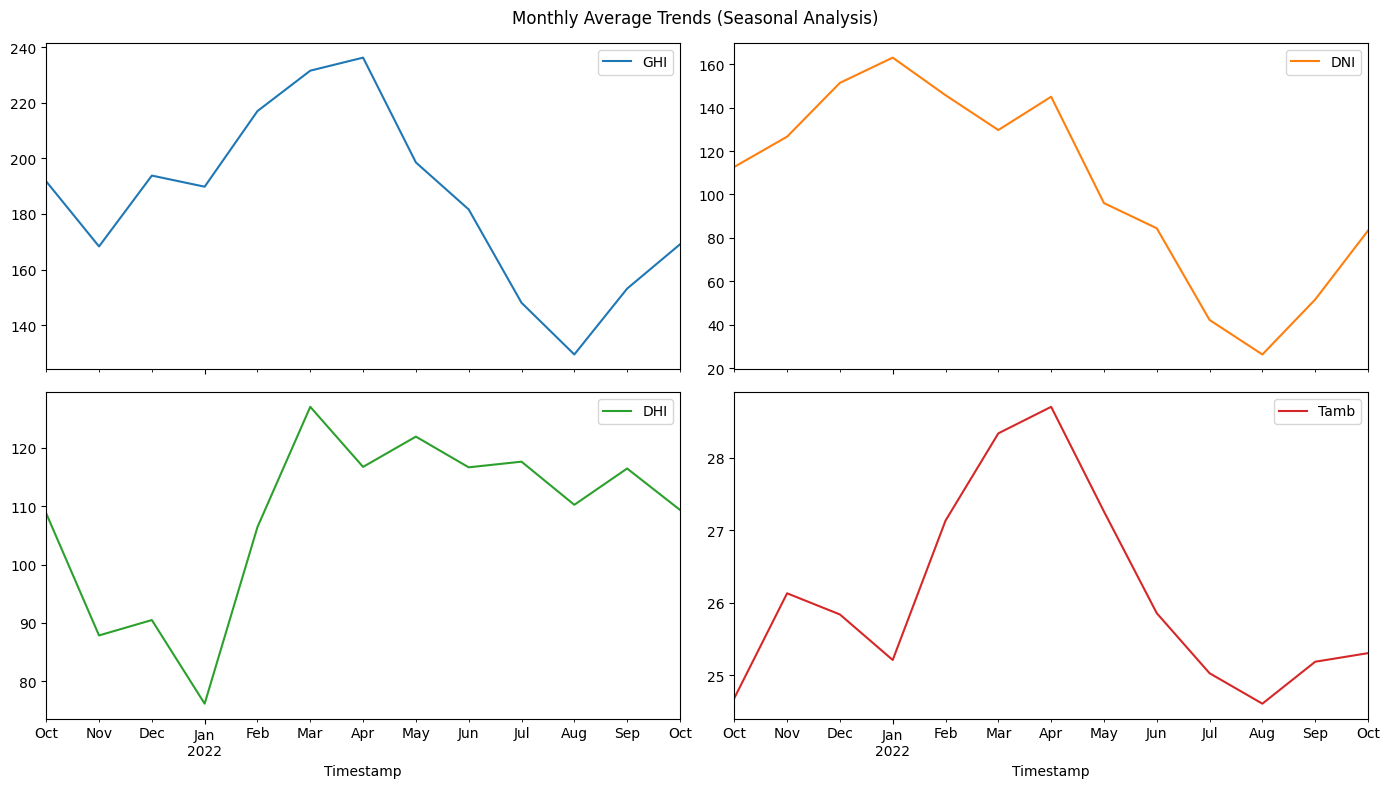

In [29]:

monthly_df = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


plt.figure(figsize=(12, 6))
monthly_df.plot(subplots=True, layout=(2, 2), figsize=(14, 8), 
                title='Monthly Average Trends (Seasonal Analysis)')
plt.tight_layout()
plt.show()

In [30]:
# Reapply the outlier cleaning flag to the original raw dataset (with outliers)
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/sierraleone-bumbuna.csv')
df2 = pd.read_csv('../data/raw_data/sierraleone-bumbuna-with-outliers.csv')

from scipy.stats import zscore

z_score_cols = ['ModA', 'ModB']
z_scores = df2[z_score_cols].apply(zscore, nan_policy='omit')
df2['cleaned_flag'] = (~(z_scores.abs() > 3).any(axis=1)).astype(int)

# Pre-clean averages
pre_avg = df2[['ModA', 'ModB']].mean().rename('Pre-Clean')

# Post-clean averages

post_avg = df[['ModA', 'ModB']].mean().rename('Post-Clean')


comparison = pd.concat([pre_avg, post_avg], axis=1)
comparison.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title('Average ModA & ModB Pre vs Post Cleaning')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '../data/raw_data/sierraleone-bumbuna-with-outliers.csv'

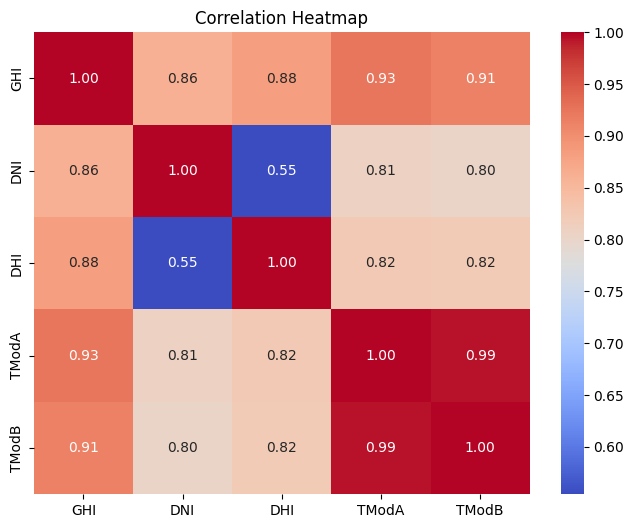

In [ ]:
import seaborn as sns

corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

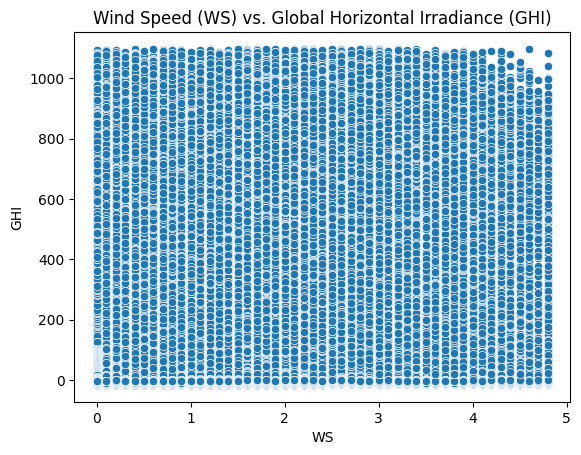

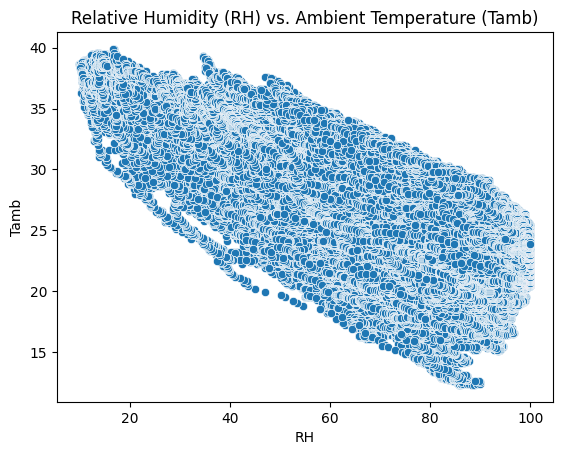

In [ ]:
# WS vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('Wind Speed (WS) vs. Global Horizontal Irradiance (GHI)')
plt.show()
# RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.show()
# Repeat for WSgust vs GHI, WD vs GHI, and RH vs GHI

In [31]:

from windrose import WindroseAxes


wind_data_clean = df[['WD', 'WS']].dropna()


ax = WindroseAxes.from_ax()
ax.bar(
    wind_data_clean['WD'], 
    wind_data_clean['WS'], 
    normed=True, 
    opening=0.8, 
    edgecolor='white' 
)
ax.set_legend()
plt.title('Wind Rose: Speed and Direction Distribution')
plt.show()

ModuleNotFoundError: No module named 'windrose'

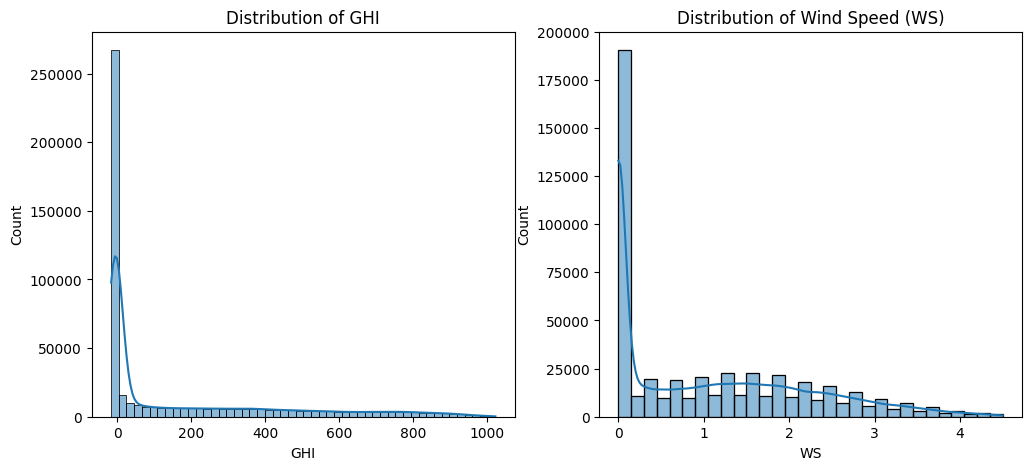

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['GHI'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of GHI')
sns.histplot(df['WS'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Wind Speed (WS)')
plt.show()

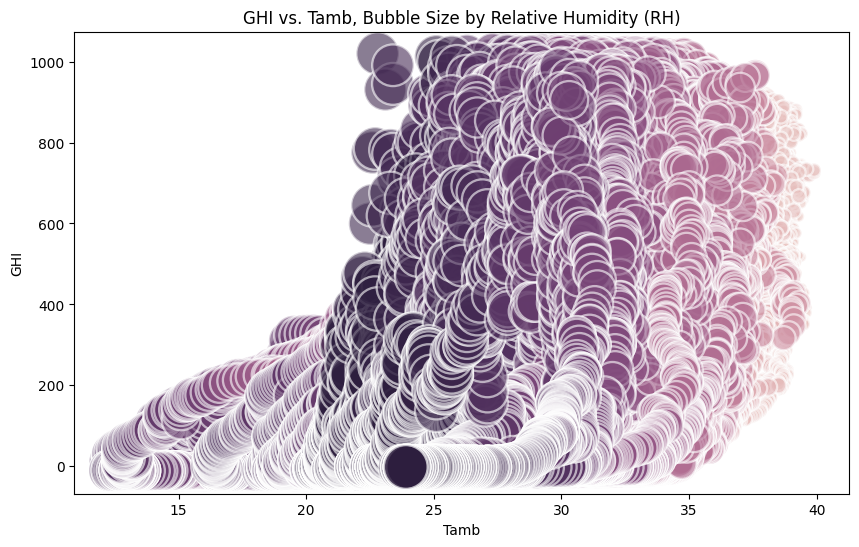

In [33]:
# Using RH for bubble size
plt.figure(figsize=(10, 6))
# Scale RH to make bubbles visible (e.g., multiplying by 50)
sns.scatterplot(x='Tamb', y='GHI', size=df['RH']*50, data=df, 
                alpha=0.6, sizes=(20, 1000), hue='RH', legend=False)
plt.title('GHI vs. Tamb, Bubble Size by Relative Humidity (RH)')
plt.show()